In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [6]:
x_train.shape

(60000, 28, 28)

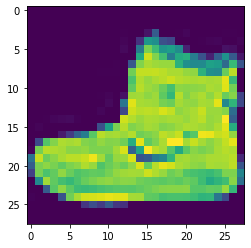

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train.max()

255

In [11]:
x_train.min()

0

In [12]:
x_train=x_train/255

In [13]:
x_test=x_test/255

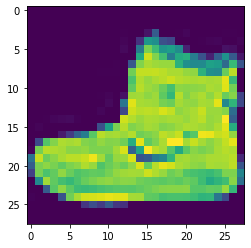

In [16]:
plt.imshow(x_train[0])

In [17]:
x_train=x_train.reshape(60000,28,28,1)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
x_test=x_test.reshape(10000,28,28,1)

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train.shape

(60000,)

In [25]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [26]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
y_train[0]

9

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [34]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [38]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 768us/sample - loss: 0.3995 - accuracy: 0.8591 - val_loss: 0.3128 - val_accuracy: 0.8890
Epoch 2/10
60000/60000 [==============================] - 40s 668us/sample - loss: 0.2706 - accuracy: 0.9013 - val_loss: 0.2909 - val_accuracy: 0.8927
Epoch 3/10
60000/60000 [==============================] - 39s 652us/sample - loss: 0.2271 - accuracy: 0.9157 - val_loss: 0.2922 - val_accuracy: 0.8902


In [39]:
metrics=pd.DataFrame(model.history.history)

In [40]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.399488,0.859100,0.312846,0.8890
1,0.270552,0.901250,0.290926,0.8927
2,0.227121,0.915667,0.292199,0.8902


In [42]:
model.metrics_names

['loss', 'accuracy']

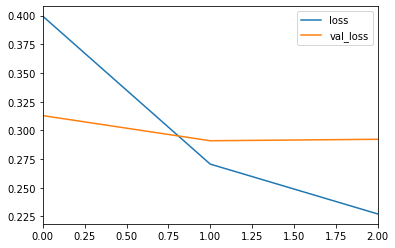

In [43]:
metrics[['loss','val_loss']].plot()

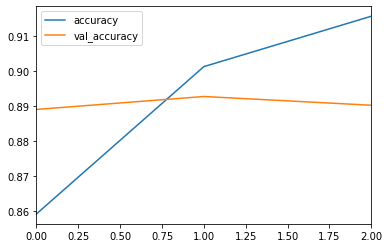

In [44]:
metrics[['accuracy','val_accuracy']].plot()

In [46]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.2921985795378685, 0.8902]

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
predictions=model.predict_classes(x_test)

In [49]:
y_cat_test.shape

(10000, 10)

In [50]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [51]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1000
           1       1.00      0.97      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.88      0.76      0.82      1000
           5       0.99      0.95      0.97      1000
           6       0.61      0.82      0.70      1000
           7       0.89      0.99      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.92      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[776,   0,  12,  10,   2,   1, 196,   0,   3,   0],
       [  2, 975,   0,  11,   2,   0,   8,   0,   2,   0],
       [ 11,   0, 828,   6,  52,   0, 103,   0,   0,   0],
       [  9,   2,  10, 897,   9,   0,  71,   0,   2,   0],
       [  0,   1,  66,  34, 764,   0, 135,   0,   0,   0],
       [  0,   0,   0,   1,   0, 948,   0,  46,   0,   5],
       [ 65,   1,  52,  18,  35,   0, 820,   0,   9,   0],
       [  0,   0,   0,   0,   0,   1,   0, 994,   0,   5],
       [  3,   0,   1,   3,   0,   1,   4,   4, 984,   0],
       [  0,   0,   0,   0,   0,   5,   1,  78,   0, 916]], dtype=int64)

In [54]:
import seaborn as sns

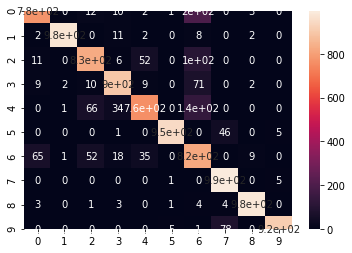

In [56]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [57]:
my_image=x_test[6]

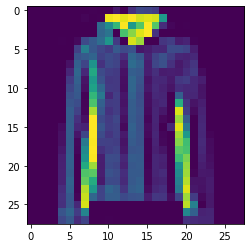

In [59]:
plt.imshow(my_image.reshape(28,28))

In [60]:
model.predict_classes(my_image.reshape(1,28,28,1))

array([4], dtype=int64)

In [61]:
y_test[6]

4